In [1]:
using Plots
using Random
using Combinatorics
using DelimitedFiles

In [2]:
function countE(G)
    n = size(G)[1]
    E = 0
    for p = 1:n
        for q = 1:n
            for k = p:n
                for l = q:n
                    if sum(G[p:k,q:l])==0
                        E = E + 1
                    end
                end
            end
        end
    end
    return E
end

countE (generic function with 1 method)

In [44]:
# Histograms of E (and C?)  for all n! configurattions (only small n this is n^5*n!, be carefull)

N = 10 

Emax = zeros(N)
Ebar = zeros(N)
Emin = zeros(N)

for n = 1:N
    T = Int(n^2 * (n+1)^2 / 4)
    E = zeros(Int,factorial(n))

    for k = 1:factorial(n)
        σ = nthperm(1:n, k)
        G = zeros(Int,n,n)
        for i = 1:n
            G[i,σ[i]] = 1
        end
        E[k] = countE(G)
    end

    Eu = sort(unique(E))
    range = maximum(Eu) - minimum(Eu) + 1
    Ehist = zeros(Int,range)
    for k = 1:range
        Ehist[k] = sum(E .== minimum(Eu) + k - 1)
    end
    
    
    x = minimum(Eu):maximum(Eu)
    Emax[n] = maximum(Eu)
    Emin[n] = minimum(Eu)
    Ebar[n] = sum(Eu)/length(Eu)
    if n >= 4
        fig = plot(size = (1400,400))
        title!("E histogram n = $n, cases = $(factorial(n)), T = $T")
        bar!(x, Ehist, label = false, xrotation = 90, margin=3Plots.mm)
        xaxis!(x,xtickfont=font(14-n))
        savefig("figs/EboxCountHist_n$n.pdf")
    end
    println("n = $n done")
end    
println(Emin)
println(Ebar)
println(Emax)

n = 1 done
n = 2 done
n = 3 done
n = 4 done
n = 5 done
n = 6 done
n = 7 done
n = 8 done
n = 9 done
n = 10 done
[0.0, 2.0, 10.0, 28.0, 63.0, 119.0, 204.0, 329.0, 488.0, 715.0]
[0.0, 2.0, 10.0, 29.5, 67.0, 132.79166666666666, 233.07407407407408, 382.76635514018693, 594.015625, 881.7250755287009]
[0.0, 2.0, 10.0, 31.0, 73.0, 149.0, 270.0, 456.0, 720.0, 1090.0]


In [47]:
# E/T evolution up to N=10, from previous box calculations

Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 

fig = plot(size = (1000,400),margin=4Plots.mm)
plot!(Ns, Emin./T, fillrange = Emax./T, fillstyle = :/, label = "range", color = :blue, alpha = .3)
plot!(Ns, Emax./T, label = false, color = :blue, alpha = .3)


plot!(Ns, Ebar./T, label = "mean E/T", color = :black)
xaxis!(Ns)
xlabel!("n")
ylabel!("E / T")
savefig("figs/ETboxPropExact.pdf")

"/home/jose/Desktop/USACH/2023_I/Coarseness/Coarseness-Examples/figs/ETboxPropExact.pdf"

In [ ]:
# Random permutation counts with n = 1:N
N = 90
R = 5

Ereps = zeros(Int, N, R)

open("out/E_rand_reps.csv", "a") do io
    for n = 1:N
        print("n=$n ")
        for r = 1:R
            T = Int(n^2 * (n+1)^2 / 4)
            G = zeros(Int,n,n)
            σ = shuffle(1:n) # 1:n para checkear
            for i = 1:n
                G[i,σ[i]] = 1
            end

            Ereps[n,r] = countE(G)
            write(io, "$(Ereps[n,r])")
            if r < R 
                write(io, ",")
            end
            print(".")
        end
        if n < N
            write(io, "\n")
        end
        print("\n")
    end
end


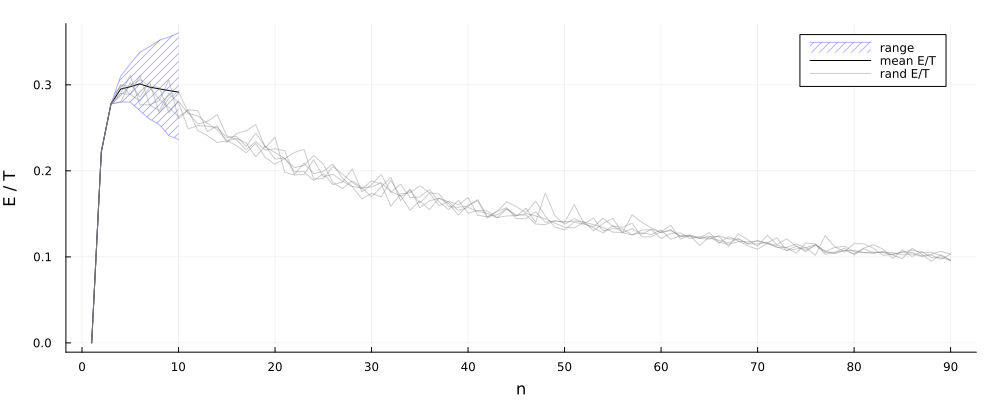

In [7]:
Emin = [0.0, 2.0, 10.0, 28.0, 63.0, 119.0, 204.0, 329.0, 488.0, 715.0]
Ebar = [0.0, 2.0, 10.0, 29.5, 67.0, 132.79166666666666, 233.07407407407408, 382.76635514018693, 594.015625, 881.7250755287009]
Emax = [0.0, 2.0, 10.0, 31.0, 73.0, 149.0, 270.0, 456.0, 720.0, 1090.0]

N = 10
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 

fig = plot(size = (1000,400),margin=4Plots.mm)
plot!(Ns, Emin./T, fillrange = Emax./T, fillstyle = :/, label = "range", color = :blue, alpha = .3)
plot!(Ns, Emax./T, label = false, color = :blue, alpha = .3)


plot!(Ns, Ebar./T, label = "mean E/T", color = :black)
xlabel!("n")
ylabel!("E / T")

Ereps = readdlm("out/E_rand_reps.csv", ',', Int, '\n')
N, R = size(Ereps)
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 
for r =1:R
    if r == 1
        plot!(1:N, Ereps[:,r]./T, label = "rand E/T", color = :gray, alpha = .4)
    else
        plot!(1:N, Ereps[:,r]./T, label = false, color = :gray, alpha = .4)
    end
end
xaxis!(0:10:N)
fig

In [25]:
# Empty boxes in the diagonal configuration fix n

n = 5
T = Int(n^2 * (n+1)^2 / 4) # =sum(cat([(n-k+1)*(n:-1:1) for k=1:n]...,dims=2)) = n²(n+1)²/4

E = 0
for k = 1:n-1
    for l = 1:n-1
        if n-l-k+1 > 0
            E = E + (n-k-l+2)*(n-k-l+1)
        end
    end
end
println("n = $n\nT = $T\nE = $E")


n = 5
T = 225
E = 70


In [9]:
# Empty boxes in the diagonal configuration
Ediag = zeros(Int,N)
for n = 1:N
    T = Int(n^2 * (n+1)^2 / 4) # =sum(cat([(n-k+1)*(n:-1:1) for k=1:n]...,dims=2)) = n²(n+1)²/4

    E = 0
    for k = 1:n-1
        for l = 1:n-1
            if n-l-k+1 > 0
                E = E + (n-k-l+2)*(n-k-l+1)
            end
        end
    end
    Ediag[n] = E
end

In [35]:
print(Ediag)

[0, 2, 10, 30, 70, 140, 252, 420, 660, 990, 1430, 2002, 2730, 3640, 4760, 6120, 7752, 9690, 11970, 14630, 17710, 21252, 25300, 29900, 35100, 40950, 47502, 54810, 62930, 71920, 81840, 92752, 104720, 117810, 132090, 147630, 164502, 182780, 202540, 223860, 246820, 271502, 297990, 326370, 356730, 389160, 423752, 460600, 499800, 541450, 585650, 632502, 682110, 734580, 790020, 848540, 910252, 975270, 1043710, 1115690, 1191330, 1270752, 1354080, 1441440, 1532960, 1628770, 1729002, 1833790, 1943270, 2057580, 2176860, 2301252, 2430900, 2565950, 2706550, 2852850, 3005002, 3163160, 3327480, 3498120, 3675240, 3859002, 4049570, 4247110, 4451790, 4663780, 4883252, 5110380, 5345340, 5588310]

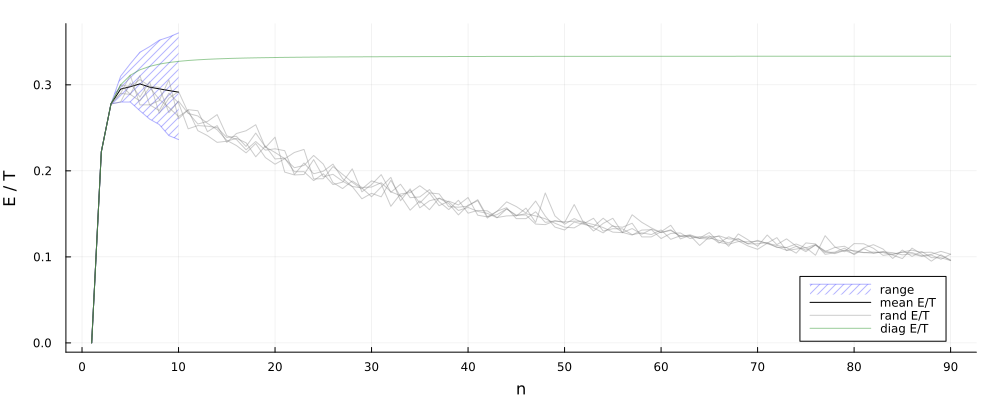

In [10]:
Emin = [0.0, 2.0, 10.0, 28.0, 63.0, 119.0, 204.0, 329.0, 488.0, 715.0]
Ebar = [0.0, 2.0, 10.0, 29.5, 67.0, 132.79166666666666, 233.07407407407408, 382.76635514018693, 594.015625, 881.7250755287009]
Emax = [0.0, 2.0, 10.0, 31.0, 73.0, 149.0, 270.0, 456.0, 720.0, 1090.0]

N = 10
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 

fig = plot(size = (1000,400),margin=4Plots.mm)
plot!(Ns, Emin./T, fillrange = Emax./T, fillstyle = :/, label = "range", color = :blue, alpha = .3)
plot!(Ns, Emax./T, label = false, color = :blue, alpha = .3)


plot!(Ns, Ebar./T, label = "mean E/T", color = :black)
xlabel!("n")
ylabel!("E / T")

Ereps = readdlm("out/E_rand_reps.csv", ',', Int, '\n')
N, R = size(Ereps)
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 
for r =1:R
    if r == 1
        plot!(1:N, Ereps[:,r]./T, label = "rand E/T", color = :gray, alpha = .4)
    else
        plot!(1:N, Ereps[:,r]./T, label = false, color = :gray, alpha = .4)
    end
end
xaxis!(0:10:N)

plot!(1:N, Ediag./T, label = "diag E/T", color = :green, alpha = .4)
#savefig("figs/ETboxPropN90.pdf")

In [105]:
# log-log plot

Emin = [0.0, 2.0, 10.0, 28.0, 63.0, 119.0, 204.0, 329.0, 488.0, 715.0]
Ebar = [0.0, 2.0, 10.0, 29.5, 67.0, 132.79166666666666, 233.07407407407408, 382.76635514018693, 594.015625, 881.7250755287009]
Emax = [0.0, 2.0, 10.0, 31.0, 73.0, 149.0, 270.0, 456.0, 720.0, 1090.0]

Ediag = [0, 2, 10, 30, 70, 140, 252, 420, 660, 990, 1430, 2002, 2730, 3640, 4760, 6120, 7752, 9690, 11970, 14630, 17710, 21252, 25300, 29900, 35100, 40950, 47502, 54810, 62930, 71920, 81840, 92752, 104720, 117810, 132090, 147630, 164502, 182780, 202540, 223860, 246820, 271502, 297990, 326370, 356730, 389160, 423752, 460600, 499800, 541450, 585650, 632502, 682110, 734580, 790020, 848540, 910252, 975270, 1043710, 1115690, 1191330, 1270752, 1354080, 1441440, 1532960, 1628770, 1729002, 1833790, 1943270, 2057580, 2176860, 2301252, 2430900, 2565950, 2706550, 2852850, 3005002, 3163160, 3327480, 3498120, 3675240, 3859002, 4049570, 4247110, 4451790, 4663780, 4883252, 5110380, 5345340, 5588310]

Ereps = readdlm("out/E_rand_reps.csv", ',', Int)





N, R = size(Ereps)
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 
Ni = 2

fig = plot(size = (700,400),margin=4Plots.mm)
plot!(log2.(Ni:N), log2.((Ni:N).^4), label = "n^4", color = :gray, alpha = .3)
plot!(log2.(Ni:N), log2.((Ni:N).^3), label = "n^3", color = :gray, alpha = .3)
plot!(log2.(Ni:N), log2.((Ni:N).^2), label = "n^2", color = :gray, alpha = .3)

for r =1:R
    if r == 1
        plot!(log2.(Ni:N), log2.(Ereps[Ni:N,r]), label = "log2(rand E)", color = :gray, alpha = .4)
    else
        plot!(log2.(Ni:N), log2.(Ereps[Ni:N,r]), label = false, color = :gray, alpha = .4)
    end
end

plot!(log2.(Ni:N), log2.(T[Ni:N]), label = "log2(T)", color = :red, alpha = .4)
plot!(log2.(Ni:N), log2.(Ediag[Ni:N]), label = "log2(diag E)", color = :green, alpha = .4)

fig

In [80]:
Nf = 90
Ni = 85

(log2.(Ereps[Nf,:])-log2.(Ereps[Ni,:])) ./ (log2(Nf) - log2(Ni)) 



5-element Vector{Float64}:
 1.8692495224453567
 3.541999719215837
 3.597467180073606
 2.3908442328779502
 4.119155440581954

In [11]:
# pinwheel matrix example

function pwm(n)
    m = n ÷ 5
    r = n - 4m 
    G = zeros(Int,n,n)
    for i = 1:m
        G[m+i,i] = 1
        G[m-i+1,2m+r+i] = 1
        G[2m+r+i,3m+r+i] = 1
        G[n-i+1,m+i] = 1
    end

    σ = shuffle(1:r) # centro
    for i = 1:r
        G[2m+i,2m+σ[i]] = 1
    end
    
    # show(stdout, "text/plain", G)
    # prod(sum(G,dims=2))
    return G
end

# Empty boxes in the diagonal configuration
N = 90
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 
Epwn = zeros(Int,N)
for n = 1:N
    print("n=$n ")
    G = pwm(n)
    Epwn[n] = countE(G)
end

n=1 n=2 n=3 n=4 n=5 n=6 n=7 n=8 n=9 n=10 n=11 n=12 n=13 n=14 n=15 n=16 n=17 n=18 n=19 n=20 n=21 n=22 n=23 n=24 n=25 n=26 n=27 n=28 n=29 n=30 n=31 n=32 n=33 n=34 n=35 n=36 n=37 n=38 n=39 n=40 n=41 n=42 n=43 n=44 n=45 n=46 n=47 n=48 n=49 n=50 n=51 n=52 n=53 n=54 n=55 n=56 n=57 n=58 n=59 n=60 n=61 n=62 n=63 n=64 n=65 n=66 n=67 n=68 n=69 n=70 n=71 n=72 n=73 n=74 n=75 n=76 n=77 n=78 n=79 n=80 n=81 n=82 n=83 n=84 n=85 n=86 n=87 n=88 n=89 n=90 

In [13]:
print(Epwn)

[0, 2, 10, 29, 64, 126, 220, 357, 566, 862, 1238, 1682, 2207, 2896, 4028, 5105, 6356, 7761, 9455, 12262, 14535, 17620, 20619, 23265, 28825, 33375, 38149, 43800, 48495, 58399, 66453, 75724, 86096, 91089, 106804, 117741, 129170, 143976, 159971, 179777, 195751, 218204, 233041, 250135, 284098, 307600, 332199, 357900, 384137, 429629, 465207, 494911, 531256, 564545, 627800, 667037, 708756, 755861, 802017, 883959, 939422, 990388, 1048949, 1108121, 1205948, 1276309, 1341684, 1421901, 1487142, 1610831, 1699263, 1778309, 1864767, 1974205, 2127307, 2229947, 2323592, 2431416, 2543310, 2732194, 2862934, 2994418, 3132342, 3266103, 3473601, 3622260, 3755818, 3923153, 4098293, 4353610]

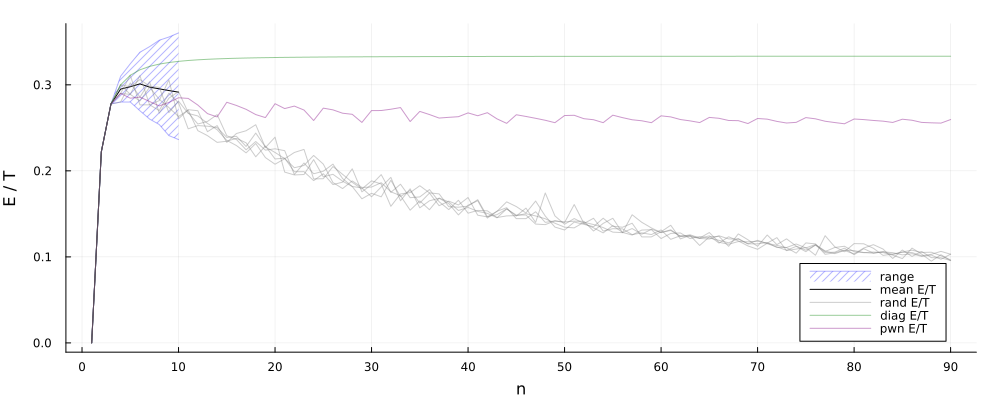

In [14]:
Emin = [0.0, 2.0, 10.0, 28.0, 63.0, 119.0, 204.0, 329.0, 488.0, 715.0]
Ebar = [0.0, 2.0, 10.0, 29.5, 67.0, 132.79166666666666, 233.07407407407408, 382.76635514018693, 594.015625, 881.7250755287009]
Emax = [0.0, 2.0, 10.0, 31.0, 73.0, 149.0, 270.0, 456.0, 720.0, 1090.0]

N = 10
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 

fig = plot(size = (1000,400),margin=4Plots.mm)
plot!(Ns, Emin./T, fillrange = Emax./T, fillstyle = :/, label = "range", color = :blue, alpha = .3)
plot!(Ns, Emax./T, label = false, color = :blue, alpha = .3)


plot!(Ns, Ebar./T, label = "mean E/T", color = :black)
xlabel!("n")
ylabel!("E / T")

Ereps = readdlm("out/E_rand_reps.csv", ',', Int, '\n')
N, R = size(Ereps)
Ns = 1:N
T = (Ns.^2 .* (Ns .+ 1).^2 ) ./ 4 
for r =1:R
    if r == 1
        plot!(1:N, Ereps[:,r]./T, label = "rand E/T", color = :gray, alpha = .4)
    else
        plot!(1:N, Ereps[:,r]./T, label = false, color = :gray, alpha = .4)
    end
end
xaxis!(0:10:N)

plot!(1:N, Ediag./T, label = "diag E/T", color = :green, alpha = .4)
plot!(1:N, Epwn./T, label = "pwn E/T", color = :purple, alpha = .4)
#savefig("figs/ETboxPropN90.pdf")